In [1]:
import numpy as np
import matplotlib.pyplot as plt

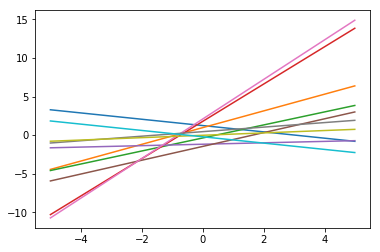

In [32]:
#Samples from beta:
mu0=np.zeros(2)
kappa0=1.
a0 = 1.
b0 = 1.
x= np.arange(-5,5,0.01)
for n in range(10):
    omega = np.random.gamma(a0,b0)
    beta = np.random.normal(mu0,1/(kappa0*omega))
    y = beta[0]+x*beta[1]
    plt.plot(x,y)
plt.show()
    

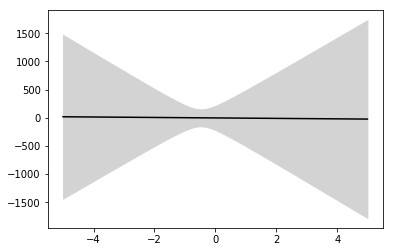

In [33]:
#Distribution over function
mu0=np.zeros(2)
a0 = 1.
b0 = 1.
x= np.arange(-5,5,0.01)
x= np.arange(-5,5,0.01)
y = np.zeros((1000,len(x)))
for n in range(1000):
    omega = np.random.gamma(a0,1./b0)
    beta = np.random.normal(mu0,1/(omega))
    y[n,:]= beta[0]+x*beta[1]

ymean = np.mean(y,0)
ysd = np.std(y,0)
plt.fill_between(x,ymean+2*ysd,ymean-2*ysd,color='lightgrey')
plt.plot(x,ymean,'k')

plt.show()
    

In [36]:
#Posterior distribution over functions
def plot_posterior(N):
    #generate data
    mu0=np.zeros(2)
    a0 = 1.
    b0 = 1.
    x= np.arange(-5,5,0.01)

    beta_true = np.array([-1,2])
    
    x_obs = np.ones((N,2))
    x_obs[:,1] = np.random.normal(size=N)
    y_obs = np.random.normal(np.dot(x_obs,beta_true))

    #posterior parameters
    
    an = a0+N/2.
    Kn = np.dot(x_obs.T,x_obs)+np.eye(2)
    mn = np.dot(np.linalg.inv(Kn),np.dot(x_obs.T,y_obs))
    bn = b0 + 0.5*(np.dot(y_obs.T,y_obs) -np.dot(mn.T,np.dot(Kn,mn)))
    
    y = np.zeros(len(x))
    for n in range(10):
        omega = np.random.gamma(an,1./bn)
        post_cov = np.linalg.inv(omega*Kn)
        beta = np.random.multivariate_normal(mn,post_cov)
        y = beta[0]+x*beta[1]
        plt.plot(x,y,'k')
    plt.plot(x_obs[:,1],y_obs,'rx')
    plt.show()
    y = np.zeros((1000,len(x)))
    for n in range(1000):
        omega = np.random.gamma(an,1./bn)
        post_cov = np.linalg.inv(omega*Kn)
        beta = np.random.multivariate_normal(mn,post_cov)
        y[n,:]= beta[0]+x*beta[1]

    ymean = np.mean(y,0)
    ysd = np.std(y,0)
    plt.fill_between(x,ymean+2*ysd,ymean-2*ysd,color='lightgrey')
    plt.plot(x,ymean,'k')
    plt.plot(x_obs[:,1],y_obs,'rx')

    plt.show()

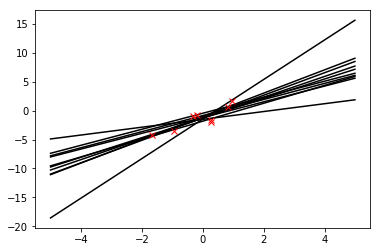

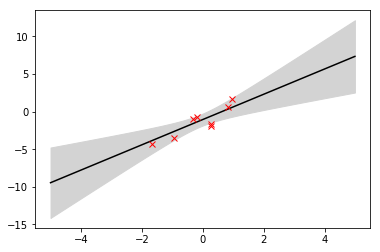

In [37]:
plot_posterior(8)

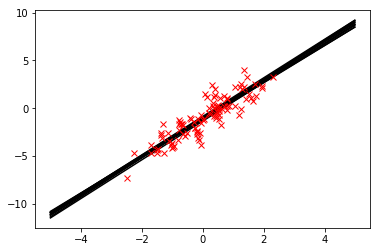

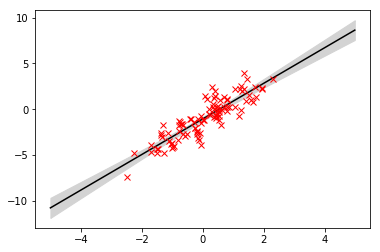

In [39]:
plot_posterior(100)